In [3]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Load the Dataset
df_rating_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225188 entries, 0 to 2225187
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   title           object 
 2   user_id         object 
 3   review          float64
 4   text            object 
 5   review_year     int64  
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 169.8+ MB


In [5]:
df_rating_raw.sample(10)

,Unnamed: 0,title,user_id,review,text,review_year,authors,publisher,categories,published_year
312778,352947,King Kelson's Bride,A1832NIF7M8D5U,2.0,"Gentle readers, fellow reviewers, hear my tale...",2000,['Katherine Kurtz'],Penguin,['Fiction'],2001
1435215,1685046,The tragedy of Romeo and Juliet (The Pelican S...,NaN,5.0,This is the best and most classic book ever. I...,2004,['William Shakespeare'],NaN,NaN,1969
590146,668514,The Bean Trees,A1NYA514GJFWJG,2.0,"this book was boring, in the end Turtle dies a...",2003,['Barbara Kingsolver'],Harper Collins,['Fiction'],2009
1247555,1456422,And Then Came You: Sam's Story,A29KA4H15VX1,5.0,"Ah, sisters, I've always wished I had one!Maur...",2004,['Maureen Child'],Macmillan,['Fiction'],2007
2088454,2496378,The True Believer Thoughts on the Nature of Ma...,A1TT5T47AVDDBM,3.0,"I wish I had read ""The True Believer"" while I ...",2002,['Eric Hoffer'],NaN,NaN,1980
791920,910172,One Flew Over the Cuckoo's Nest,A1QWGA44V1B1E8,5.0,This is one of the only books I've ever called...,2011,['Ken Kesey'],Penguin,['Fiction'],2016
34940,39868,The Last Book of Swords: Shieldbreaker's Story...,ADGINJRP1J5T5,5.0,I bought it to complete the rest of my series....,2013,['Fred Saberhagen'],Macmillan,['Fiction'],1995
1518286,1786537,Sugar Blues,A2WVP2D0MHLXDN,5.0,This is the only book that I can truly say cha...,2006,['William Dufty'],NaN,"['Carbohydrates', ' Refined']",1980
690112,786937,Memory in Death (In Death #22),AIPUTMQPWRQX6,5.0,It was a great read and I would tell everybody...,2006,['J. D. Robb'],Penguin,['Fiction'],2006
1856388,2205572,"The Complete Idiot's Guide to the Bible, Third...",A3SZWG4BDWMK56,5.0,"So many people read from the bible each week, ...",2001,"['James S. Bell', ' Stan Campbell']",Penguin,['Religion'],2005


In [6]:
df_rating_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2225188.0,1.306479e+06,771943.466723,14.0,628596.75,1293502.5,1974205.25,2666313.0
review,2225188.0,4.205266e+00,1.212553,1.0,4.00,5.0,5.00,5.0
review_year,2225188.0,2.005443e+03,4.805013,1969.0,2001.00,2005.0,2010.00,2013.0
published_year,2225188.0,2.000065e+03,27.906941,101.0,1999.00,2007.0,2012.00,2023.0


In [7]:
df_rating_raw['review'].value_counts()

review
5.0    1336158
4.0     431099
3.0     189915
1.0     153456
2.0     114560
Name: count, dtype: int64

In [8]:
pd.set_option('display.max_colwidth', 150)

In [9]:
df_rating_raw[df_rating_raw['review']==5]['text'].sample(5, random_state=1299)

117408     It had been awhile since I had read this book so I went ahead and grabbed the kindle version. Nice illustrations good text. I would recommend this...
327663     When I saw this book for the first time I realised that a serious topic can be approached in the wittiest ways: by making it attractive to its aud...
118330     This is the best book I have ever read! I never used to like reading books until one day when my mom got me this book. If you like Fantasy books t...
1799133    Marquez writes in such a way that you find yourself in Macondo, living along the coronel, seeing what he sees and feeling immersed in a simple lif...
1357728    I first read this book when I was about 14, and I have read it many, many times since then. Handsome twin suitors, mystery, danger, beauty, suspen...
Name: text, dtype: object

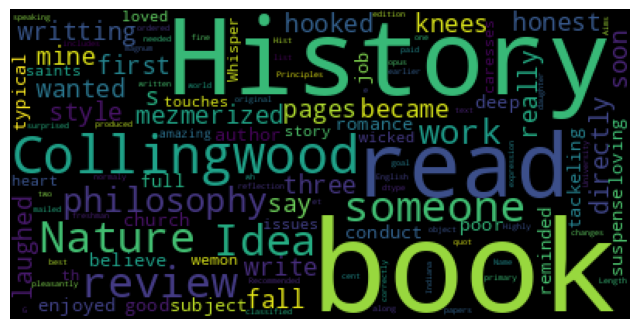

In [10]:
wordcloud5 = WordCloud(max_words=1000).generate(str(df_rating_raw[df_rating_raw['review']==5]['text']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [11]:
df_rating_raw[df_rating_raw['review']==1]['text'].sample(5, random_state=1299)

390255     Although I never got past chapter 8 in this book, the part that I did read was very bad and unrealistic. There is a very slim chance that the pilo...
1722450    I read many relationship books and self help books, but this one is definitely not a seller. Its very general and it talks about the ordinary day ...
549193     I finally figured out why this book was written!I read it when it came out, and I really didn't get it then. I thought it was horrible, and a wast...
1074098    While the book may be a good tool for a bible study class, it did not meet the purpose for which I purchased it. My great-grandparents taught them...
1084683    Ugg. I can't believe they're going to make it a movie! I was really looking forward to this book because I loved the first movie, but gees, talk a...
Name: text, dtype: object

In [12]:
df_rating_raw[df_rating_raw['review']==3]['text'].sample(5, random_state=1299)

1667916    Though overall this book is too "new age" for my taste, I believe Ms. Kohanov probably does a tremendous amount of good pairing horses with people...
1532933    Interesting! I would like to see more detective work and not just &#34;There it Is&#34;. Jackson writes a very good mystery. Maybe a little too mu...
1486989    In the introduction to the Insight Edition of Sense and Sensibility Julie Klassen writes: "Jane Austen is more popular now than during her lifetim...
1304279    Plenty of people have commented about the teaching style, and I do not have much to add in that regard. I bought this book as an adjunct to the Go...
1430480             Was expecting a book,what I received was copies of pages copied from a library book and reproduced as a booklet, Very cheaply made. product.
Name: text, dtype: object

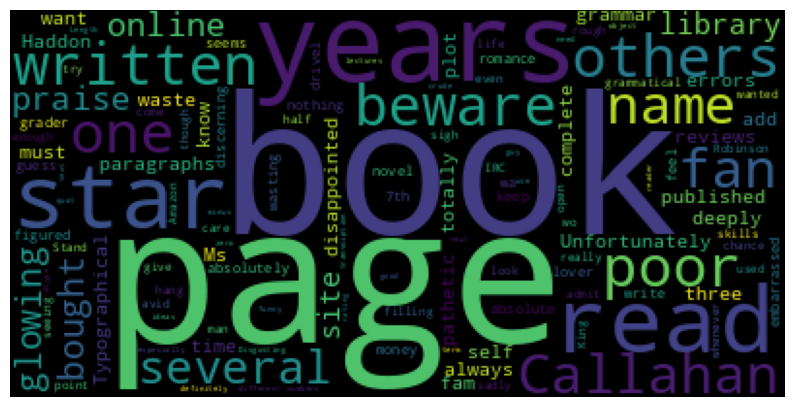

In [13]:
wordcloud1 = WordCloud(max_words=1000).generate(str(df_rating_raw[df_rating_raw['review']==1]['text']))

fig = plt.figure(figsize=(10,8))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

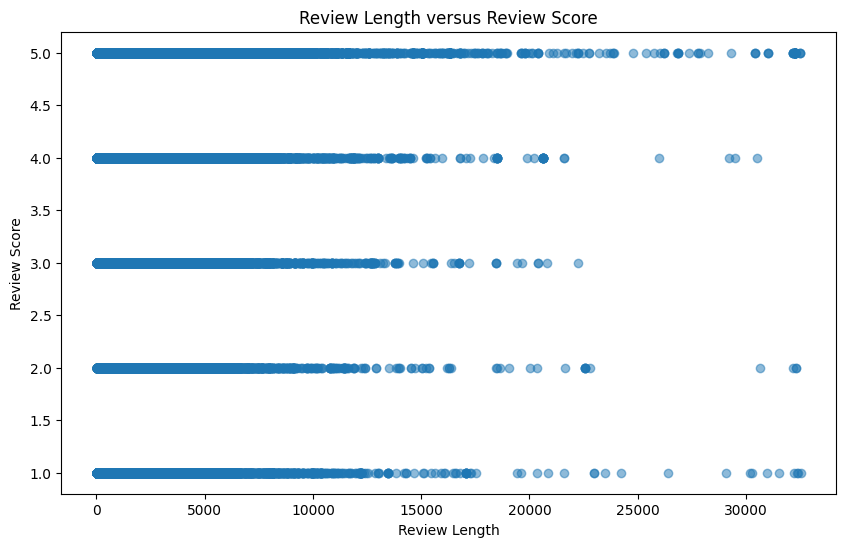

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_rating_raw['text'].str.len(), df_rating_raw['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [15]:
df_rating_raw['text'].str.len().mean()

823.889594497184

In [16]:
df_rating_raw['text'].str.len().std()

957.8308494348678

In [17]:
long_reviews = df_rating_raw[df_rating_raw['text'].str.len() > 2000].copy()

len(long_reviews)

190207

In [18]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,190207.0,1.286518e+06,776811.213633,45.0,604574.0,1264428.0,1957154.5,2666308.0
review,190207.0,4.121946e+00,1.164725,1.0,4.0,5.0,5.0,5.0
review_year,190207.0,2.005813e+03,3.791237,1996.0,2003.0,2006.0,2009.0,2013.0
published_year,190207.0,1.998745e+03,31.128254,101.0,1998.0,2007.0,2012.0,2023.0


In [19]:
long_reviews['text'].str.len().mean()

3209.4335171681378

In [20]:
short_reviews = df_rating_raw[df_rating_raw['text'].str.len() < 200].copy()

len(short_reviews)

391498

In [21]:
short_reviews['text'].str.len().mean()

137.24388119479536

In [22]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,391498.0,1.295278e+06,772693.363700,68.0,590127.75,1270004.0,1969530.75,2666311.0
review,391498.0,4.396574e+00,1.100470,1.0,4.00,5.0,5.00,5.0
review_year,391498.0,2.008212e+03,4.987421,1995.0,2005.00,2010.0,2012.00,2013.0
published_year,391498.0,1.999031e+03,31.160475,101.0,1998.00,2007.0,2012.00,2023.0


In [23]:
high_reviews = df_rating_raw[df_rating_raw['review'] == 5].copy()

high_reviews['text'].str.len().mean()

758.7400629266898

In [24]:
neutral_reviews = df_rating_raw[df_rating_raw['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text'].str.len().mean()

977.9661690756391

In [25]:
low_reviews = df_rating_raw[df_rating_raw['review'] == 1].copy()

low_reviews['text'].str.len().mean()

792.885393858826

<Figure size 1000x600 with 0 Axes>

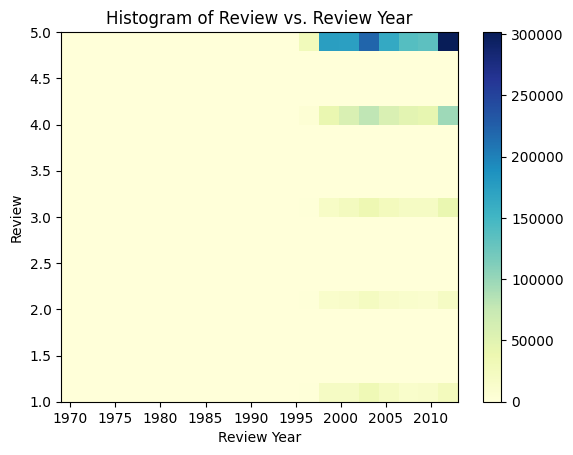

In [29]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.figure()
plt.hist2d(df_rating_raw['review_year'], df_rating_raw['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

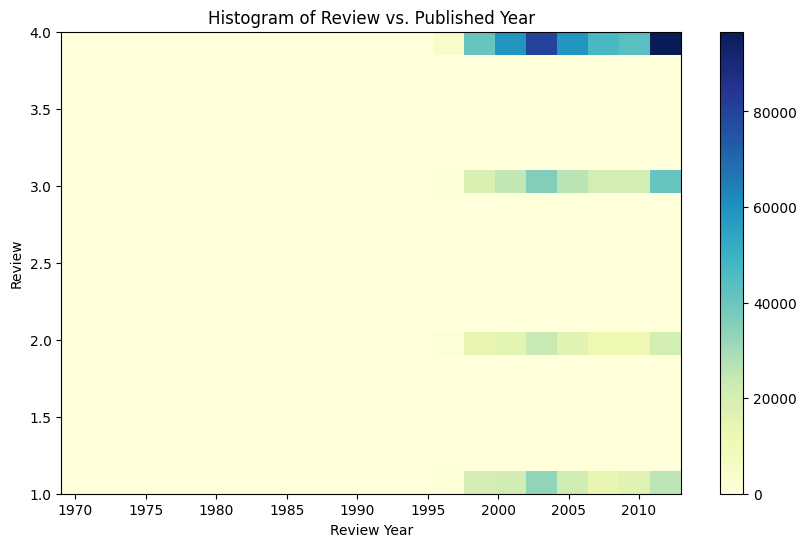

In [64]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_rating_raw[df_rating_raw['review'] != 5]['review_year'], df_rating_raw[df_rating_raw['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

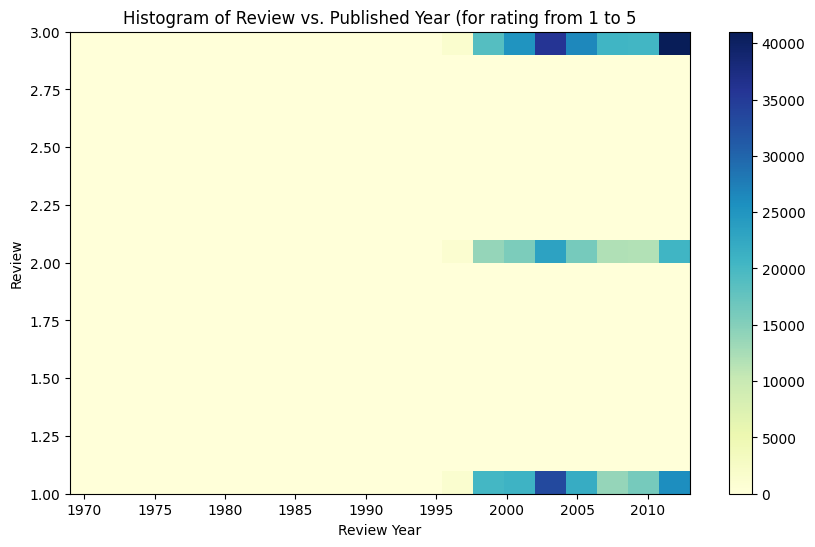

In [65]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_rating_raw[(df_rating_raw['review'] != 4) & (df_rating_raw['review'] != 5)]['review_year'], df_rating_raw[(df_rating_raw['review'] != 4) & (df_rating_raw['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

In [1]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_rating_raw[df_rating_raw['review_year'] <= 2000]['review_year'], df_rating_raw[df_rating_raw['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

NameError: name 'plt' is not defined